# 第9回のコード

Juliaの実装を紹介する。

なおこのコードの実行の前に以下のパッケージをインストールする必要がある。

```
using Pkg
Pkg.add("IJulia")
Pkg.add("Plots")
Pkg.add("IntervalArithmetic")
```

さらにこのjupyternotebookのある同じフォルダ内に`Steady_States.jl`を入れて`include`する必要がある。

In [1]:
include("Steady_States.jl")
a0 = [21.76559237081062 + 1.9383270997089583e-15im,  -8.239872952409614e-17 - 15.52560346219531im,     -2.0529575661128727 - 3.458412655394703e-17im,  -1.2754497393195608e-16 + 0.20271153310873213im,    0.017792322732511922 - 1.5458169995924245e-17im, -1.4548095422091757e-17 - 0.001464057311108157im, -0.00011565242433419476 - 4.1824736389430116e-18im, -1.9267431864170404e-17 + 8.882126364740443e-6im,    6.682275005228726e-7 - 7.226007071519279e-21im,  1.1439108917991743e-18 - 4.948676958952778e-8im,  -3.6217002459190806e-9 - 2.6489251128693893e-18im];
a = newton(a0)

Before iteration: 6.742407245951825e-13


11-element Vector{ComplexF64}:
       21.76559237081062 + 1.9383270997089583e-15im
  -8.239872952409614e-17 - 15.52560346219531im
     -2.0529575661128727 - 3.458412655394703e-17im
 -1.2754497393195608e-16 + 0.20271153310873213im
    0.017792322732511922 - 1.5458169995924245e-17im
 -1.4548095422091757e-17 - 0.001464057311108157im
 -0.00011565242433419476 - 4.1824736389430116e-18im
 -1.9267431864170404e-17 + 8.882126364740443e-6im
    6.682275005228726e-7 - 7.226007071519279e-21im
  1.1439108917991743e-18 - 4.948676958952778e-8im
  -3.6217002459190806e-9 - 2.6489251128693893e-18im

In [ ]:
# n = 31
# X1_re = zeros(n)
# X1_re[1:2:end] .= 10
# X1_im = zeros(n)
# X1_im[2:2:end] .= 10
# a0 = X1_re + X1_im*im
# # iterate newton method
# a = newton(a0)
# plot_periodic_complex(a)

In [2]:
nu = 1.1
DF = DF_steady_states(a)
A = inv(DF)
iA = map(Interval,A)
m = length(a)

11

In [3]:
### Y0 ###
a_ext =[a;zeros(ComplexF64,m-1)] 
inu = interval(nu);
F1_ext = iF_steady_states(a_ext)
omega = 2*@interval(pi)
k_tail = (m:2*m-2)
mu_k_tail = omega^2 .* interval.(-k_tail.^2)
y1_F = abs.(iA*F1_ext[1:m])#y_F(2:m+1); 
y1_tail = abs.(F1_ext[m+1:2*m-1]./mu_k_tail)
y1 = [y1_F;y1_tail];
nu_power = [1; 2*inu.^interval.(1:2*m-2)]
Y0 = sum(y1.*nu_power)
@show sup(Y0);

sup(Y0) = 1.602412596565774e-9


In [4]:
### Z0 ###
iDF = iDF_steady_states(a)
B = I - iA*iDF
Z0 = operator_norm(B,inu,0)
@show Z0;

Z0 = 3.677102015122465e-15


In [5]:
### Z1 ###
hQa = zeros(m,1)
for k=1:m-1
    ell = (m:k+m)
    hQa[k+1]=(1/2)*maximum(mag, abs.( a_ext[abs.(k.-ell) .+ 1] )./ (inu.^interval.(abs.(ell))))
end

hQa = interval.(hQa)
Z1 = 2*norma(iA*hQa,inu) + norma(a,inu)/(2*m^2*@interval(pi)^2)
@show sup(Z1);

sup(Z1) = 0.034175229747980006


In [6]:
### Z2 ###
normA = operator_norm(iA,inu,1)
Z2 = 2*normA
@show Z2;

Z2 = 0.13266982158706028


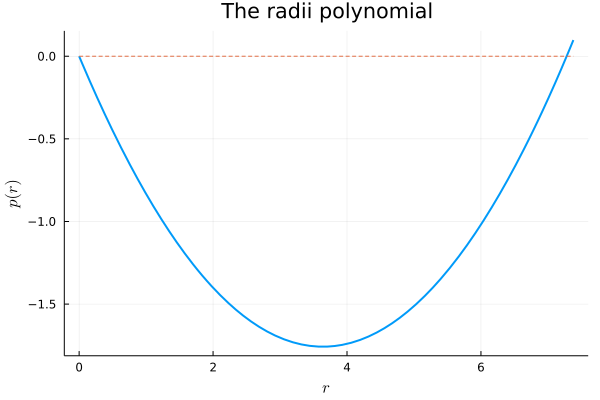

In [7]:
### radii polynomial ###
p(r) = Z2*r^2 - (1-Z0-sup(Z1))*r + sup(Y0)
rmax = inf(((1-Z0-Z1) + sqrt((1-Z0-Z1)^2-4*Y0*Z2))/(2*Z2)) + 0.1
# 
plot(p,0,rmax,
    line       = 2,
    size       = (600,400),
    legend     = false,
    title="The radii polynomial",
    xlabel     = "\$r\$",
    ylabel     = "\$p\\,(r)\$", 
)
fzero(x) = 0
plot!(fzero,0,rmax,linestyle=:dash)
# savefig("radii-poly.pdf")

In [8]:
# rmin = sup(((1-Z0-Z1) - sqrt((1-Z0-Z1)^2-4*Y0*Z2))/(2*Z2))
# rmax = inf(((1-Z0-Z1) + sqrt((1-Z0-Z1)^2-4*Y0*Z2))/(2*Z2))
# println("rmin = $rmin, \nrmax = $rmax")
# p(r) = Z2*r^2 - (1-Z1-Z0)*r + Y0
a =Z2
b = -(1-Z0-Z1)
c = Y0

if b^2-4*a*c < 0
    println("error: connot find the root of radii polynomial")
else
    r_min = (-b - sqrt(b^2-4*a*c))/(2a)
    r_max = (-b + sqrt(b^2-4*a*c))/(2a)
    r₀ = r_min
    println("The validated radius r0 is in [$(sup(r_min)), $(inf(r_max))].")
end

The validated radius r0 is in [1.6591140964938667e-9, 7.279913084062683].
